In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv()

True

In [13]:
db_name = os.getenv("db_name")
db_user = os.getenv("db_user")
db_password = os.getenv("db_password")
db_host = os.getenv("db_host")

engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}/{db_name}')

In [14]:
query = "SELECT * FROM StockPrice;"

df = pd.read_sql(query, engine)

In [15]:
df.head()

,ticker,date,open,high,low,close,volume,dividends,splits
0,NOVN.SW,2019-07-11,70.33,70.75,69.05,69.24,6741749,0.0,0.0
1,NOVN.SW,2019-07-12,69.13,69.13,67.42,67.42,14439736,0.0,0.0
2,NOVN.SW,2019-07-15,67.33,68.12,67.03,67.91,6911171,0.0,0.0
3,NOVN.SW,2019-07-16,67.93,68.31,67.80,68.11,5953075,0.0,0.0
4,NOVN.SW,2019-07-17,68.16,69.74,68.09,69.38,7912449,0.0,0.0


In [18]:
df = df.set_index("date", drop=True)
df.head()

,ticker,open,high,low,close,volume,dividends,splits
date,,,,,,,,
2019-07-11,NOVN.SW,70.33,70.75,69.05,69.24,6741749,0.0,0.0
2019-07-12,NOVN.SW,69.13,69.13,67.42,67.42,14439736,0.0,0.0
2019-07-15,NOVN.SW,67.33,68.12,67.03,67.91,6911171,0.0,0.0
2019-07-16,NOVN.SW,67.93,68.31,67.80,68.11,5953075,0.0,0.0
2019-07-17,NOVN.SW,68.16,69.74,68.09,69.38,7912449,0.0,0.0


In [97]:
df_novn = df[df["ticker"] == "NOVN.SW"]
df_novn

,ticker,open,high,low,close,volume,dividends,splits
date,,,,,,,,
2019-07-11,NOVN.SW,70.33,70.75,69.05,69.24,6741749,0.0,0.0
2019-07-12,NOVN.SW,69.13,69.13,67.42,67.42,14439736,0.0,0.0
2019-07-15,NOVN.SW,67.33,68.12,67.03,67.91,6911171,0.0,0.0
2019-07-16,NOVN.SW,67.93,68.31,67.80,68.11,5953075,0.0,0.0
2019-07-17,NOVN.SW,68.16,69.74,68.09,69.38,7912449,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-07-05,NOVN.SW,97.50,97.64,96.48,96.61,2230130,0.0,0.0
2024-07-08,NOVN.SW,96.94,97.68,96.37,97.22,2622047,0.0,0.0
2024-07-09,NOVN.SW,97.00,98.00,96.83,97.09,2513132,0.0,0.0


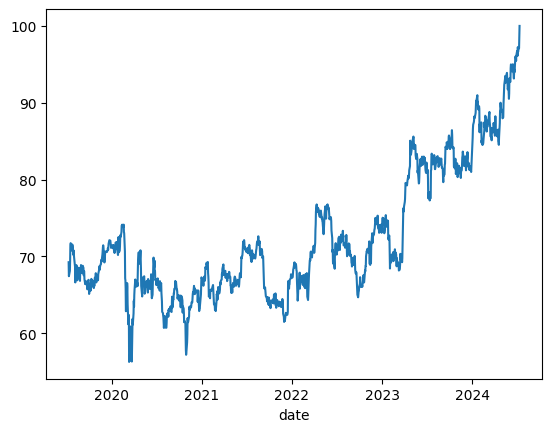

In [98]:
df_novn["close"].plot()
plt.show()

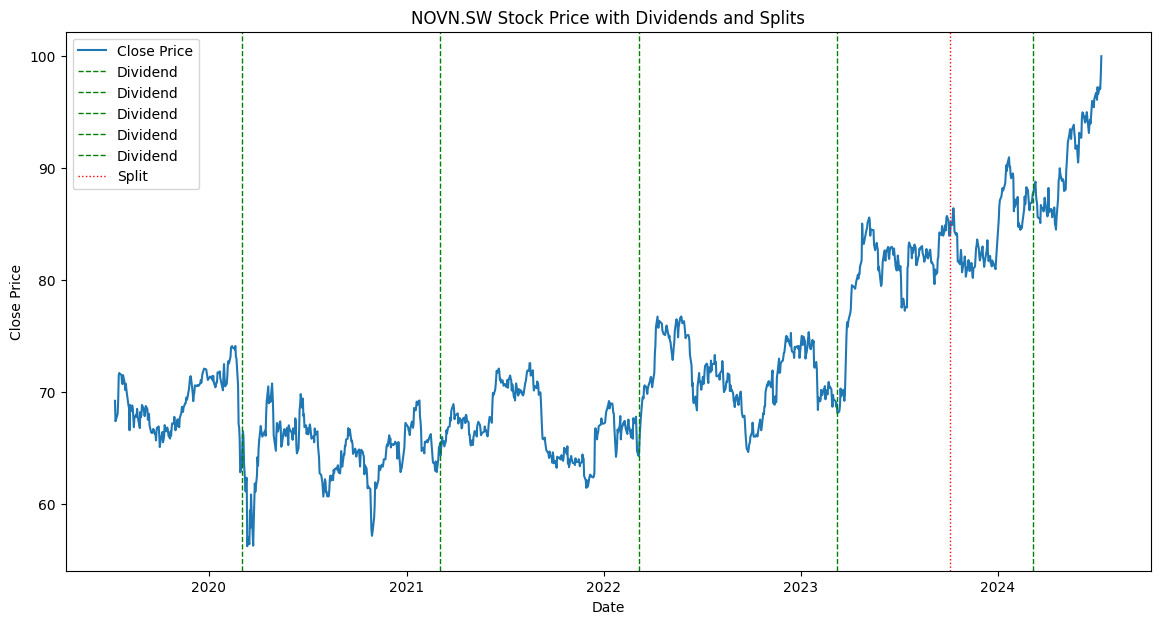

In [99]:
# Plotten des Schlusskurses
plt.figure(figsize=(14, 7))
plt.plot(df_novn.index, df_novn["close"], label='Close Price')

# Dividenden einzeichnen
dividend_dates = df_novn[df_novn["dividends"] > 0].index
for date in dividend_dates:
    plt.axvline(x=date, color='g', linestyle='--', lw=1, label='Dividend')

# Splits einzeichnen
split_dates = df_novn[df_novn["splits"] > 0].index
for date in split_dates:
    plt.axvline(x=date, color='r', linestyle=':', lw=1, label='Split')

# Titel und Labels hinzufügen
plt.title('NOVN.SW Stock Price with Dividends and Splits')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Plot anzeigen
plt.show()

In [40]:
df_ts = df.pivot_table(values='close', index=df.index, columns='ticker')[:-1]
df_ts = df_ts.ffill()
df_ts

ticker,AAPL,NOVN.SW,PFE
date,,,
2019-07-11,48.68,69.24,33.27
2019-07-12,49.05,67.42,32.82
2019-07-15,49.51,67.91,33.09
2019-07-16,49.34,68.11,33.17
2019-07-17,49.06,69.38,33.08
...,...,...,...
2024-07-04,221.55,97.24,27.70
2024-07-05,226.34,96.61,28.05
2024-07-08,227.82,97.22,27.93


<Axes: xlabel='date'>

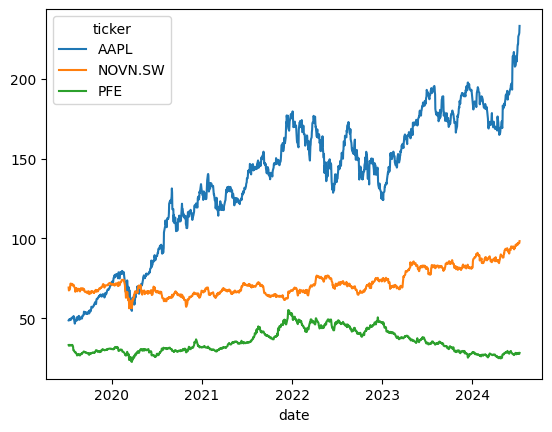

In [41]:
df_ts.plot()

In [46]:
df_ts

ticker,AAPL,NOVN.SW,PFE
date,,,
2019-07-11,48.68,69.24,33.27
2019-07-12,49.05,67.42,32.82
2019-07-15,49.51,67.91,33.09
2019-07-16,49.34,68.11,33.17
2019-07-17,49.06,69.38,33.08
...,...,...,...
2024-07-04,221.55,97.24,27.70
2024-07-05,226.34,96.61,28.05
2024-07-08,227.82,97.22,27.93


In [51]:
226.34 / 221.55

1.0216204017151884

In [70]:
df_change = df_ts.pct_change() + 1
df_change["Benchmark"] = df_change.prod(axis=1)
df_change

ticker,AAPL,NOVN.SW,PFE,Benchmark
date,,,,
2019-07-11,NaN,NaN,NaN,1.000000
2019-07-12,1.007601,0.973715,0.986474,0.967845
2019-07-15,1.009378,1.007268,1.008227,1.025078
2019-07-16,0.996566,1.002945,1.002418,1.001918
2019-07-17,0.994325,1.018646,0.997287,1.010117
...,...,...,...,...
2024-07-04,1.000000,1.011757,1.000000,1.011757
2024-07-05,1.021620,0.993521,1.012635,1.027826
2024-07-08,1.006539,1.006314,0.995722,1.008561


In [71]:
df_change.iloc[0] = 100
df_change

ticker,AAPL,NOVN.SW,PFE,Benchmark
date,,,,
2019-07-11,100.000000,100.000000,100.000000,100.000000
2019-07-12,1.007601,0.973715,0.986474,0.967845
2019-07-15,1.009378,1.007268,1.008227,1.025078
2019-07-16,0.996566,1.002945,1.002418,1.001918
2019-07-17,0.994325,1.018646,0.997287,1.010117
...,...,...,...,...
2024-07-04,1.000000,1.011757,1.000000,1.011757
2024-07-05,1.021620,0.993521,1.012635,1.027826
2024-07-08,1.006539,1.006314,0.995722,1.008561


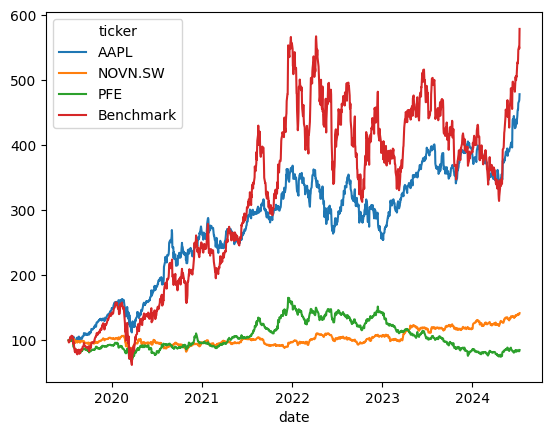

In [72]:
df_change.cumprod().plot()
plt.show()

In [134]:
df_ts_pct_changes = df_ts.pct_change() * 100
df_ts_pct_changes

ticker,AAPL,NOVN.SW,PFE
date,,,
2019-07-11,NaN,NaN,NaN
2019-07-12,0.760066,-2.628538,-1.352570
2019-07-15,0.937819,0.726787,0.822669
2019-07-16,-0.343365,0.294507,0.241765
2019-07-17,-0.567491,1.864631,-0.271330
...,...,...,...
2024-07-04,0.000000,1.175736,0.000000
2024-07-05,2.162040,-0.647882,1.263538
2024-07-08,0.653884,0.631405,-0.427807


In [151]:
df_ts_pct_changes.corr()

ticker,AAPL,NOVN.SW,PFE
ticker,,,
AAPL,1.000000,0.188066,0.295870
NOVN.SW,0.188066,1.000000,0.271859
PFE,0.295870,0.271859,1.000000


In [150]:
df_ts_pct_changes.rolling(window=3).corr()


ticker                  AAPL   NOVN.SW       PFE
date       ticker                               
2019-07-11 AAPL          NaN       NaN       NaN
           NOVN.SW       NaN       NaN       NaN
           PFE           NaN       NaN       NaN
2019-07-12 AAPL          NaN       NaN       NaN
           NOVN.SW       NaN       NaN       NaN
...                      ...       ...       ...
2024-07-09 NOVN.SW -0.710382  1.000000 -0.706211
           PFE      0.999983 -0.706211  1.000000
2024-07-10 AAPL     1.000000  0.916022  0.997121
           NOVN.SW  0.916022  1.000000  0.882967
           PFE      0.997121  0.882967  1.000000

[3870 rows x 3 columns]

<Axes: xlabel='date'>

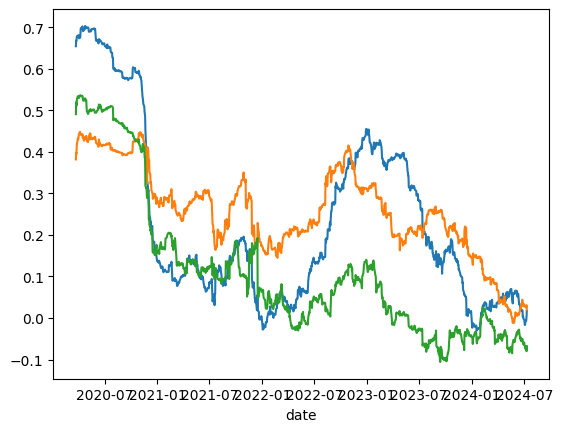

In [148]:
df_ts_pct_changes['AAPL'].rolling(window=180).corr(df_ts_pct_changes['PFE']).plot()
df_ts_pct_changes['NOVN.SW'].rolling(window=180).corr(df_ts_pct_changes['PFE']).plot()
df_ts_pct_changes['NOVN.SW'].rolling(window=180).corr(df_ts_pct_changes['AAPL']).plot()


In [100]:
df_novn

,ticker,open,high,low,close,volume,dividends,splits
date,,,,,,,,
2019-07-11,NOVN.SW,70.33,70.75,69.05,69.24,6741749,0.0,0.0
2019-07-12,NOVN.SW,69.13,69.13,67.42,67.42,14439736,0.0,0.0
2019-07-15,NOVN.SW,67.33,68.12,67.03,67.91,6911171,0.0,0.0
2019-07-16,NOVN.SW,67.93,68.31,67.80,68.11,5953075,0.0,0.0
2019-07-17,NOVN.SW,68.16,69.74,68.09,69.38,7912449,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-07-05,NOVN.SW,97.50,97.64,96.48,96.61,2230130,0.0,0.0
2024-07-08,NOVN.SW,96.94,97.68,96.37,97.22,2622047,0.0,0.0
2024-07-09,NOVN.SW,97.00,98.00,96.83,97.09,2513132,0.0,0.0


In [104]:
df_novn.loc[:, "change"] = df_novn['close'].pct_change()
df_novn.loc[:, "change"] = df_novn["change"].fillna(0)
df_novn

,ticker,open,high,low,close,volume,dividends,splits,change,change direction
date,,,,,,,,,,
2019-07-11,NOVN.SW,70.33,70.75,69.05,69.24,6741749,0.0,0.0,0.000000,positive
2019-07-12,NOVN.SW,69.13,69.13,67.42,67.42,14439736,0.0,0.0,-0.026285,negative
2019-07-15,NOVN.SW,67.33,68.12,67.03,67.91,6911171,0.0,0.0,0.007268,positive
2019-07-16,NOVN.SW,67.93,68.31,67.80,68.11,5953075,0.0,0.0,0.002945,positive
2019-07-17,NOVN.SW,68.16,69.74,68.09,69.38,7912449,0.0,0.0,0.018646,positive
...,...,...,...,...,...,...,...,...,...,...
2024-07-05,NOVN.SW,97.50,97.64,96.48,96.61,2230130,0.0,0.0,-0.006479,negative
2024-07-08,NOVN.SW,96.94,97.68,96.37,97.22,2622047,0.0,0.0,0.006314,positive
2024-07-09,NOVN.SW,97.00,98.00,96.83,97.09,2513132,0.0,0.0,-0.001337,negative


In [105]:
df_novn.loc[:, "change direction"] = np.where(df_novn["change"] >= 0, "positive", "negative")
df_novn

,ticker,open,high,low,close,volume,dividends,splits,change,change direction
date,,,,,,,,,,
2019-07-11,NOVN.SW,70.33,70.75,69.05,69.24,6741749,0.0,0.0,0.000000,positive
2019-07-12,NOVN.SW,69.13,69.13,67.42,67.42,14439736,0.0,0.0,-0.026285,negative
2019-07-15,NOVN.SW,67.33,68.12,67.03,67.91,6911171,0.0,0.0,0.007268,positive
2019-07-16,NOVN.SW,67.93,68.31,67.80,68.11,5953075,0.0,0.0,0.002945,positive
2019-07-17,NOVN.SW,68.16,69.74,68.09,69.38,7912449,0.0,0.0,0.018646,positive
...,...,...,...,...,...,...,...,...,...,...
2024-07-05,NOVN.SW,97.50,97.64,96.48,96.61,2230130,0.0,0.0,-0.006479,negative
2024-07-08,NOVN.SW,96.94,97.68,96.37,97.22,2622047,0.0,0.0,0.006314,positive
2024-07-09,NOVN.SW,97.00,98.00,96.83,97.09,2513132,0.0,0.0,-0.001337,negative


In [112]:
df_novn[["change", "change direction"]].groupby(["change direction"]).agg({"change": ["count", "mean", "min", "max"]})

change                              
                  count      mean       min       max
change direction                                     
negative            614 -0.008187 -0.097964 -0.000117
positive            648  0.008459  0.000000  0.077133

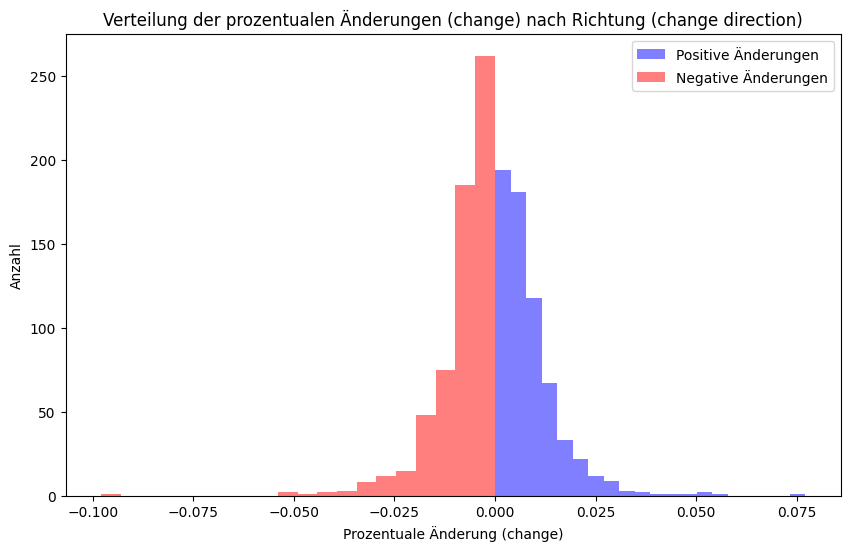

In [113]:
# Erstellen der Histogramme
positive_changes = df_novn[df_novn["change direction"] == "positive"]["change"]
negative_changes = df_novn[df_novn["change direction"] == "negative"]["change"]

plt.figure(figsize=(10, 6))

# Histogramm für positive Änderungen
plt.hist(positive_changes, bins=20, alpha=0.5, label='Positive Änderungen', color='blue')

# Histogramm für negative Änderungen
plt.hist(negative_changes, bins=20, alpha=0.5, label='Negative Änderungen', color='red')

# Diagrammtitel und Achsenbeschriftungen
plt.title('Verteilung der prozentualen Änderungen (change) nach Richtung (change direction)')
plt.xlabel('Prozentuale Änderung (change)')
plt.ylabel('Anzahl')
plt.legend()

# Diagramm anzeigen
plt.show()

In [115]:
df_novn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 2019-07-11 to 2024-07-11
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticker            1262 non-null   object 
 1   open              1262 non-null   float64
 2   high              1262 non-null   float64
 3   low               1262 non-null   float64
 4   close             1262 non-null   float64
 5   volume            1262 non-null   int64  
 6   dividends         1262 non-null   float64
 7   splits            1262 non-null   float64
 8   change            1262 non-null   float64
 9   change direction  1262 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 140.7+ KB


/var/folders/gq/y5b3q9f527v5_z9y7t6wchb00000gn/T/ipykernel_9786/597101418.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_returns = df_novn_weekly.groupby('week', group_keys=False, as_index=False).apply(


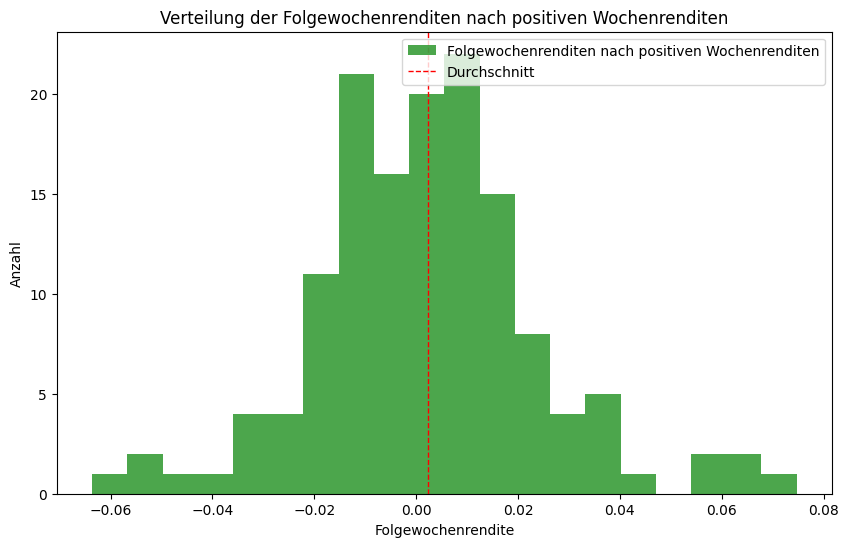

In [125]:
df_novn_weekly = df_novn.copy()
df_novn_weekly.index = pd.to_datetime(df_novn_weekly.index)


df_novn_weekly['week'] = df_novn_weekly.index.to_period('W')
weekly_returns = df_novn_weekly.groupby('week', group_keys=False, as_index=False).apply(
    lambda x: pd.Series({'weekly_return': (x['close'].iloc[-1] - x['open'].iloc[0]) / x['open'].iloc[0]})
)

weekly_returns['next_week_return'] = weekly_returns['weekly_return'].shift(-1)

positive_week_returns = weekly_returns[weekly_returns['weekly_return'] >= 0]
negative_week_returns = weekly_returns[weekly_returns['weekly_return'] < 0]


plt.figure(figsize=(10, 6))
plt.hist(positive_week_returns['next_week_return'].dropna(), bins=20, alpha=0.7, label='Folgewochenrenditen nach positiven Wochenrenditen', color='green')
plt.axvline(positive_week_returns['next_week_return'].dropna().mean(), color='red', linestyle='dashed', linewidth=1, label='Durchschnitt')
plt.title('Verteilung der Folgewochenrenditen nach positiven Wochenrenditen')
plt.xlabel('Folgewochenrendite')
plt.ylabel('Anzahl')
plt.legend()
plt.show()

In [128]:
positive_week_returns.next_week_return.mean(), negative_week_returns.next_week_return.mean()

(np.float64(0.0022815553038524183), np.float64(0.001126601376815597))

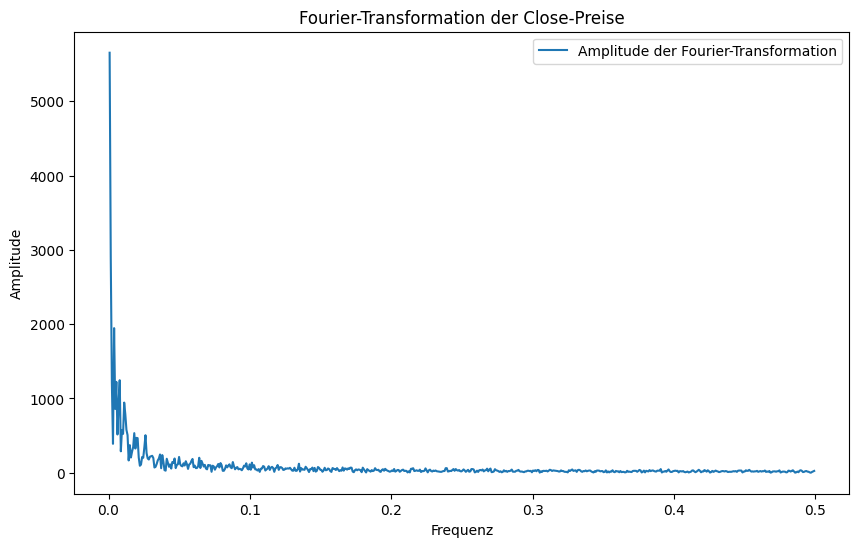

In [153]:
close_prices_novn = df_novn['close'].values
fft_result = np.fft.fft(close_prices_novn)

# Berechnung der Frequenzen
frequencies = np.fft.fftfreq(len(close_prices_novn))

# Filtern der positiven Frequenzen und Amplituden
positive_freqs = frequencies > 0
frequencies = frequencies[positive_freqs]
amplitudes = np.abs(fft_result)[positive_freqs]

# Plotten des Spektrums
plt.figure(figsize=(10, 6))
plt.plot(frequencies, amplitudes, label='Amplitude der Fourier-Transformation')
plt.title('Fourier-Transformation der Close-Preise')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
plt.legend()
plt.show()